# Basic image classification: Classify images of clothing

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

## Preprocess the data

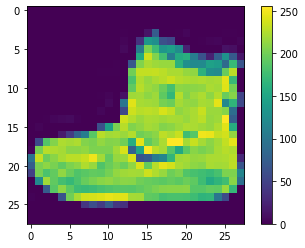

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

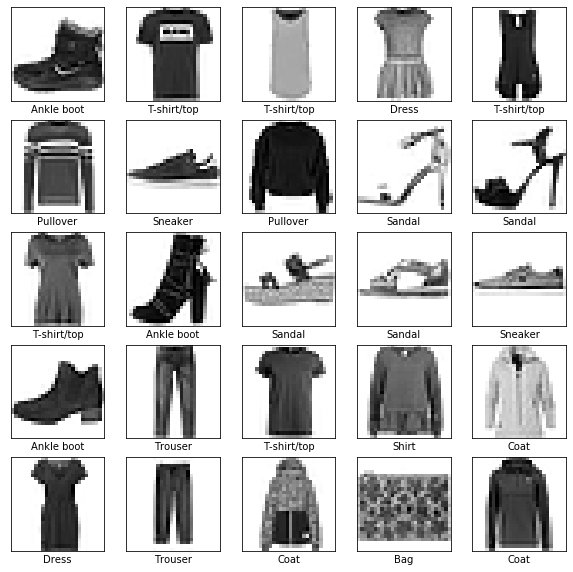

In [9]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

In [12]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10),
    ]
)

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4973 - accuracy: 0.8260
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3736 - accuracy: 0.8661
Epoch 3/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3356 - accuracy: 0.8779
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3124 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2941 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2767 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2668 - accuracy: 0.9012
Epoch 8/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2554 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2453 - accuracy: 0.9081
Epoch 10/

In [15]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 1s - loss: 0.2644 - accuracy: 0.8817


In [16]:
probability_model = tf.keras.Sequential(
    [
        model,
        keras.layers.Softmax()
    ]
)

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([1.2496194e-07, 3.7543697e-09, 4.7633730e-08, 1.6442871e-10,
       5.0854201e-09, 1.4370105e-03, 1.5277028e-06, 1.8494394e-02,
       6.4484182e-09, 9.8006678e-01], dtype=float32)

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                        class_names[true_label]), color=color)
    
    
def plot_pmf(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


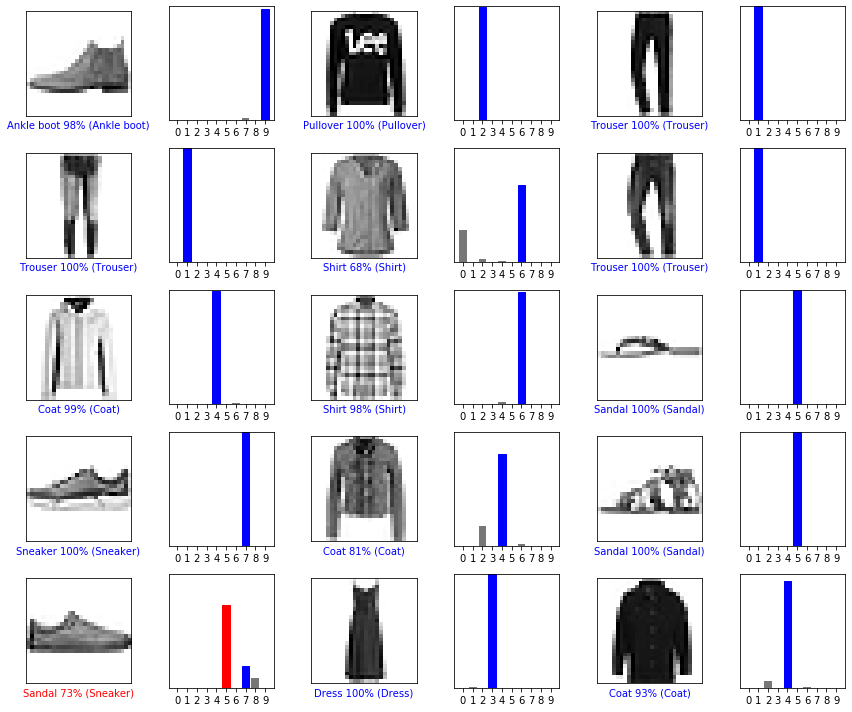

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pmf(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [21]:
class_names[5]

'Sandal'

## Use the trained model

In [28]:
img = test_images[1]
img = np.expand_dims(img, 0)

In [26]:
img.shape

(1, 28, 28)

In [27]:
predictions_single = probability_model.predict(img)

In [30]:
predictions_single

array([[1.5634278e-05, 4.1098672e-10, 9.9705648e-01, 2.4720612e-09,
        2.7939505e-03, 1.7328885e-07, 1.3380327e-04, 1.3192494e-14,
        1.2878372e-09, 2.7243263e-15]], dtype=float32)

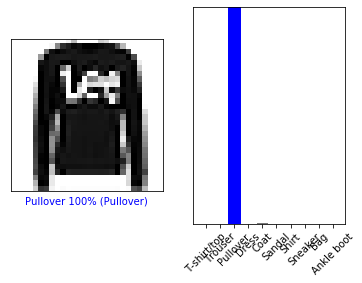

In [41]:
plt.subplot(1, 2, 1)
plot_image(1, predictions_single, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_pmf(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45);

In [42]:
keras.Model.predict?

Signature:
keras.Model.predict(
    self,
    x,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Generates output predictions for the input samples.

Computation is done in batches.

Arguments:
    x: Input samples. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A `tf.data` dataset.
      - A generator or `keras.utils.Sequence` instance.
    batch_size: Integer or `None`.
        Number of samples per gradient update.
        If unspecified, `batch_size` will default to 32.
        Do not specify the `batch_size` is your data is in the
        form of symbolic tensors, dataset,
        generators, or `keras.utils.Sequence` instances (since they generate
        batches).
    verbose: Verbosity mode, 0 or